#  **Softmax Regression, One-vs-All and One-vs-One for Multi-class Classification**


In [1]:
!pip install scikit-learn==1.0.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

## Utility Function


This function plots a different decision boundary. 


In [3]:
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


This function will plot the probability of belonging to each class; each column is the probability of belonging to a class and the row number is the sample number.


In [21]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.figure(figsize=(10,6))    
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In ths lab we will use the  iris dataset,  it consists of three different types of irises’ (Setosa y=0, Versicolour y=1, and Virginica y=2), petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns: Sepal Length, Sepal Width, Petal Length and Petal Width.

The following plot uses the second two features:


In [5]:
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

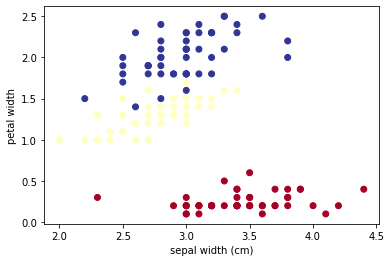

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

## **Softmax Regression**  


SoftMax regression is similar to logistic regression, and the softmax function converts the actual distances, that is, dot products of $x$ with each of the parameters $\theta_i$ for the $K$ classes. This is converted to probabilities using the following: 


$softmax(x,i) = \frac{e^{ \theta_i^T \bf x}}{\sum_{j=1}^K e^{\theta_j^T x}} $


The training procedure is almost identical to logistic regression. Consider the three-class example where $y \in \{0,1,2\}$ we would like to classify $x_1$. We can use the softmax function to generate a probability of how likely the sample belongs to each class:


$[softmax(x_1,0),softmax(x_1,1),softmax(x_1,2)]=[0.97,0.2,0.1]$


The index of each probability is the same as the class. We can make a prediction using the argmax function:


$\hat{y}=argmax_i  \{softmax(x,i)\}$


For the previous example, we can make a prediction as follows:


$\hat{y}=argmax_i  \{[0.97,0.2,0.1]\}=0$


The <code>sklearn</code> does this automatically, but we can verify the prediction step, as we fit the model:


In [7]:
lr = LogisticRegression(random_state=0).fit(X, y)

We generate the probability using the method <ocde>predict_proba</code>:


In [15]:
probability = lr.predict_proba(X)
probability[0:4]

array([[9.57671606e-01, 4.22321095e-02, 9.62845517e-05],
       [8.83227089e-01, 1.16528398e-01, 2.44512665e-04],
       [9.21407872e-01, 7.84220195e-02, 1.70108222e-04],
       [9.04000900e-01, 9.57947290e-02, 2.04371365e-04]])

We can plot the probability of belonging to each class; each column is the probability of belonging to a class and the row number is the sample number.


plot_probability_array(X,probability)

Here, is the output for the first sample:


In [23]:
probability[0,:]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

We see it sums to one.


In [24]:
probability[0,:].sum()

0.9999999999999999

We can apply the $argmax$ function.


In [25]:
np.argmax(probability[0,:])

0

We can apply the $argmax$ function to each sample.


In [26]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

We can verify that sklearn does this under the hood by comparing it to the output of the method <code> predict  </code>.


In [27]:
yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

We can't use Softmax regression for SVMs, Let's explore two methods of Multi-class Classification that we can apply to SVM.


## SVM 


Sklean performs Multi-class Classification automatically, we can apply the method and calculate the accuracy. Train a SVM classifier with the `kernel` set to `linear`, `gamma` set to `0.5`, and the `probability` paramter set to `True`, then train the model using the `X` and `y` data.


In [28]:
model = SVC(kernel='linear', gamma=.5, probability=True)

model.fit(X,y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [29]:
yhat = model.predict(X)

accuracy_score(y,yhat)

0.96

We can plot the decision_boundary.

{0, 1, 2}


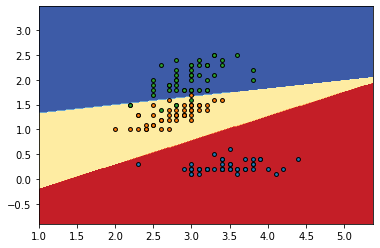

In [30]:
decision_boundary (X,y,model,iris)